In [2]:
# Librerias
import numpy as np
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

# **Problema 1**

Resuelve numéricamente la ecuación de reacción-difusión para el caso de condiciones de frontera tipo Dirichlet por el método de BTCS, con condición inicial $u(x,0)=0$, y condiciones a la frontera $u(0,t)=1$ y $u(1,t)=2$, para un tiempo $t=0,..,1$.

Muestra una gráfica de la evolución temporal de la reacción difusión de los compuestos.

True


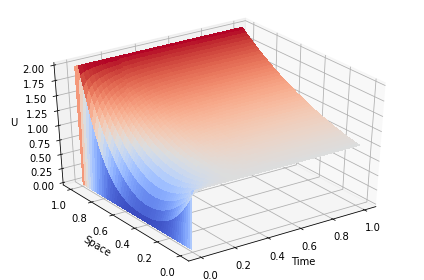

In [15]:
# Finite Difference Method
# Dirichlet boundary conditions
# 1D reaction-diffusion

M = 200 # GRID POINTS on space interval
N = 200 # GRID POINTS on time interval

x0 = 0
xL = 1

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

# Time
t0 = 0
tF = 1

# ----- Time step -----
dt = (tF - t0)/(N - 1)

D = 1  # Diffusion coefficient
alpha = -1 # Reaction rate

r = dt*D/dx**2
s = dt*alpha;

# Mesh
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

# Diagonal matrix
main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Initial condition -----
U[:,0] = 0.0 #u(x,0)=0

#----- Dirichlet boundary conditions -----
U[0,:] = 1.0 # u(0,t)=1
U[-1,:] = 2.0 # u(1,t)=2

for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2  # Right hand side
    U[1:M-1, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.coolwarm, antialiased=False)

# Labels
ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')

# POV
ax.view_init(35, -125)

plt.tight_layout()
plt.show()

Sabemos que U es la concentración del compuesto químico. Podemos ver en la gráfica como el tubo empieza a llenarse de manera rápida, pero después tiende a una concentración estable.

# **Problema 2**

Ahora supondremos que se colocan reguladores de presión, que permiten flujo de los gases desde los reservorios hacia el tubo inicialmente vacío $u(x,0) = 0$. 
En $x=0$, el flujo de gas es $\partial u/\partial x (0,t) = 0.1$ y en $x=1$ el flujo $\partial u/\partial x (1,t) = 0.2$.

Se pide realizar una simulación numérica de este escenario para $=0,..,10$.

True


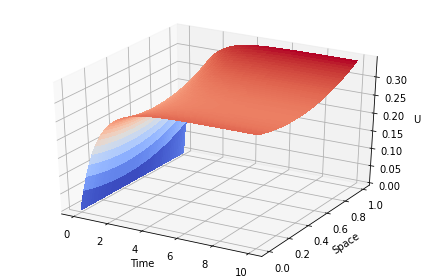

In [13]:
# Finite Difference Method
# Neumann boundary conditions
# 1D reaction-diffusion

M = 200 # GRID POINTS on space interval
N = 200 # GRID POINTS on time interval

# Lenght
x0 = 0
xL = 1

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

# Time
t0 = 0
tF = 10

# ----- Time step -----
dt = (tF - t0)/(N - 1)

D = 1  # Diffusion coefficient
alpha = -1 # Reaction rate

r = dt*D/dx**2
s = dt*alpha
a = 1 + 2*r - s

# Mesh
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

# Diagonal matrix
main_diag = (1 + 2*r - s)*np.ones((1,M))
off_diag = -r*np.ones((1, M-1))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()
A[0,1] = -2*r
A[M-1,M-2] = -2*r

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Initial condition -----
U[:,0] = 0.0 # Emptiness condition

#----- Neumann boundary conditions -----
f = 0.1*np.ones([N +1,1]) # In x=0 for any given time, 0.1
g = 0.2 *np.ones([N+1,1]) # In x=1 for any given time, 0.2


for k in range(1, N):
    c = np.zeros((M-2,1)).ravel()
    b1 = np.asarray([2*r*dx*f[k], 2*r*dx*g[k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[0:M, k-1])
    b = b1 + b2  # Right hand side
    U[0:M, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
gc = np.allclose(np.dot(A,U[0:M,N-1]), b)
print(gc)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.coolwarm, antialiased=False)

# Label
ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')

plt.tight_layout()
plt.show()

A diferencia del problema anterior, aquí el intervalo de tiempo es más amplio. Podemos observar que rapidamente llega a un nivel de estabilidad, pero la concentración estable es menor que la del problema anterior. 

# **Problema 3**

¿Que pasaría en el caso de que se mezclaran dos gases que no reaccionan entre si, como sería mezclar dos recipientes con el mismo tipo de gas (el coeficiente de reacción $\alpha=0$)?.

Suponga que inicialmente el tubo está vacío $u(x,0)=0$ y la concentración en $u(0,t)=1$ y $u(1,t)=2$.

Resuelva numéricamente este caso.

True


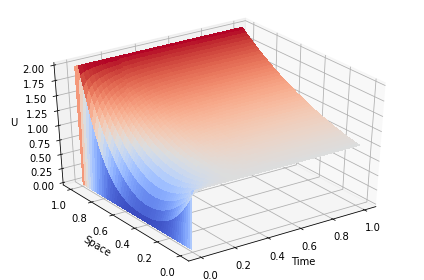

In [18]:
# Finite Difference Method
# Dirichlet boundary conditions
# 1D reaction-diffusion

M = 200 # GRID POINTS on space interval  #Cantidad de puntos en el espacio
N = 200 # GRID POINTS on time interval #Puntos en el tiempo

# Lenght
x0 = 0
xL = 1

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

# Time
t0 = 0
tF = 1

# ----- Time step -----
dt = (tF - t0)/(N - 1)
#Paso en el tiempo
D = 1 # Diffusion coefficient
alpha = 0 # Reaction rate

r = dt*D/dx**2
s = dt*alpha;

# Mesh
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

# Diagonal matrix
main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Initial condition -----

U[:,0] = 0.0 # Emptiness condition

#----- Dirichlet boundary conditions -----
U[0,:] = 1.0 # u(0,t)=1
U[-1,:] = 2.0 # u(l,t)=2

for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2  # Right hand side
    U[1:M-1, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.coolwarm, antialiased=False)
# Tags
ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')

# POV
ax.view_init(35,-125)
plt.tight_layout()
plt.show()

Podemos notar a primera instancia que la gráfica es bastante similar a la del problema uno. Aquí contaomos con un coeficiente $\alpha$ mayor y podemos notar como es por poco mayor que el problema 1, si empezamos a variar este valor podemos ver como cambia la forma. $\alpha$ es proporcional al nivel de concentración.